# Predicting Retail E-Commerce
This workshop focuses on predicting how much money customers spend online shopping. For this notebook, we're going to use an e-commerce dataset of online shopping found on [Kaggle](https://www.kaggle.com/kolawale/focusing-on-mobile-app-or-website).

Your task is to predict the yearly amount a customer will spend on your site given a number of factors such as time on website, time on app, etc.

Our aim is to practice linear regression analysis by predicting some numerical value for the yearly amount of money spent online based on these different customer shopping behaviors. 

---
## Useful Jupyter Shortcuts

Below is a (far from comprehensive) shortcut list for Jupyter Notebooks:

* `shift` + `Enter`: Run cell
* `enter`: Enter *write* mode
* `esc`: Exit *write* mode and enter *navigation* mode
* (in nav. mode) `a`: Add cell above current cell
* (in nav. mode) `b`: Add cell below current cell
* (in nav. mode) `m`: Turn current cell into text
* (in nav. mode) `y`: Turn current cell into code
* (in nav. mode) `d` x2: Delete current cell
* `tab`: Tab completion
* `shift` + `tab`: Show documentation / parameters

Some Jupyter / iPython magic:

* Add `?` at the beginning of a command to see documentation for the function/method/etc
* Add `%matplotlib inline` at the beginning of your notebook for in-line plots

And some useful configurations:

* `plt.rcParams['figure.figsize'] = (18.0, 12.0)`: Set the default matplotlib figure size
* `pd.set_option('display.max_columns', None)`: Asks pandas to show us **all** columns in dataframes

To get rid of the margin and make the cells cover 100% of the window width run the below code block:
```
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
```

---

## Sourcing the Data
We'll start our analysis by sourcing the data. But before we get started, we need to import the necessary library.

In [1]:
import pandas as pd  # For dataframe manipulation

### Load the data

In [2]:
# Load the data
df = pd.read_csv("regression_ecommerce_data.csv")

### How many columns and rows?

In [3]:
# Find the number of columns and rows
df.shape

(500, 8)

### How does the data look like?

In [4]:
# Preview of the first few columns of the dataset
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Are there any missing values?

In [5]:
# How clean is our data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


---

## Simple Linear Regression

The data has been loaded successfully and we've learned a bit about its characteristics. In this section we will first make use of Simple Linear Regression to try to predict our target. As such our first task identify our target variable and select one of the remaining independent variables as our predictor.

### What should we use as dependent and independent variables?

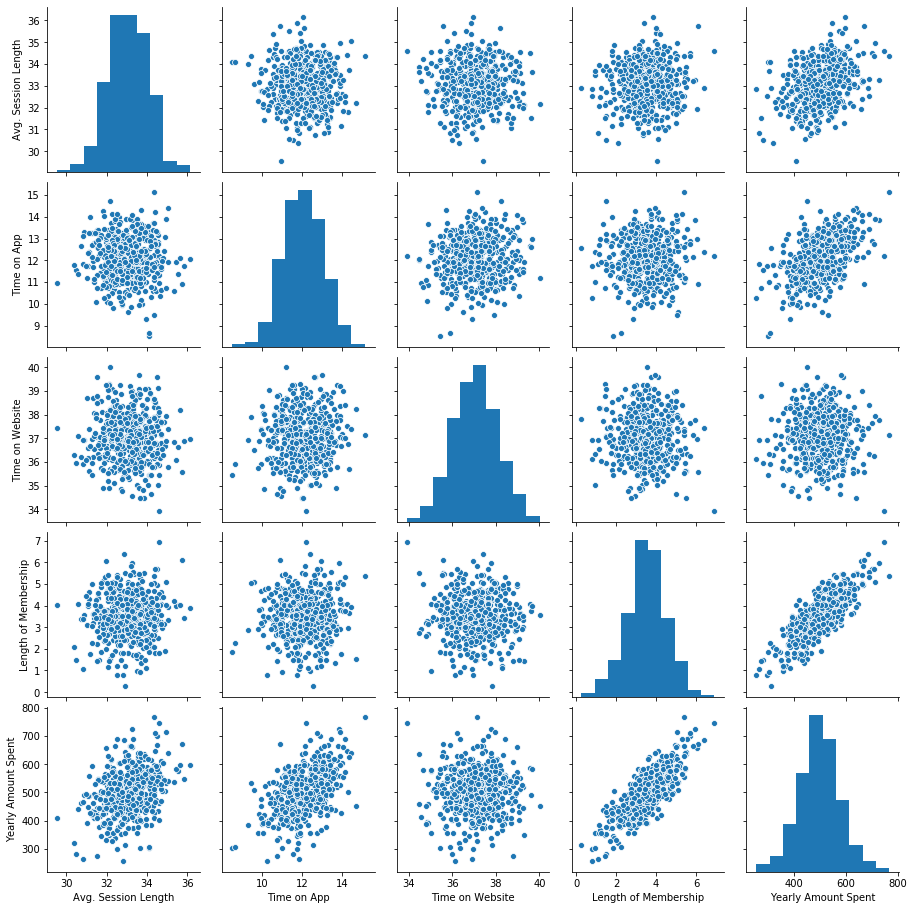

In [6]:
# Import plotting library
import seaborn as sns
%matplotlib inline

# Create a pairplot to visualise the relationships between our variables & the distributions of our data
sns.pairplot(df)

Pairplots are visually appealing, but they're slow, not ideal for large datasets, and bombard us with a lot of information.

That said, we can use them today to point us in the right direction of better understanding the relationships in the dataset.

On the main diagonal, we can see a different kind of chart compared to the rest of the plot. Because it doesn't make sense to produce a scatterplot of variable with itself (there's no new information to be found there - it will be perfectly correlated) the plots instead show a distribution of values for each column, so that you can check the shape of every distribution and/or immediately spot if you have low-variability columns (e.g. categorical variable with values present mainly for only 1 category). 

---

There are some nice options available in `sns.pairplot` that can make our plots prettier and more informative:

* Since the plots are symmetrical we can set `corner=True` to only show the plots **below** the diagonal.
* We can substitute the diagonal histograms for density plots with `diag_kind='kde'`.
* We can have `seaborn` compute simple linear regressions 'on-the-fly' and plot the regression lines with `kind='reg'`.
* We can change the marker type to `+` with `markers='+'` (feel free to experiment with different markers).

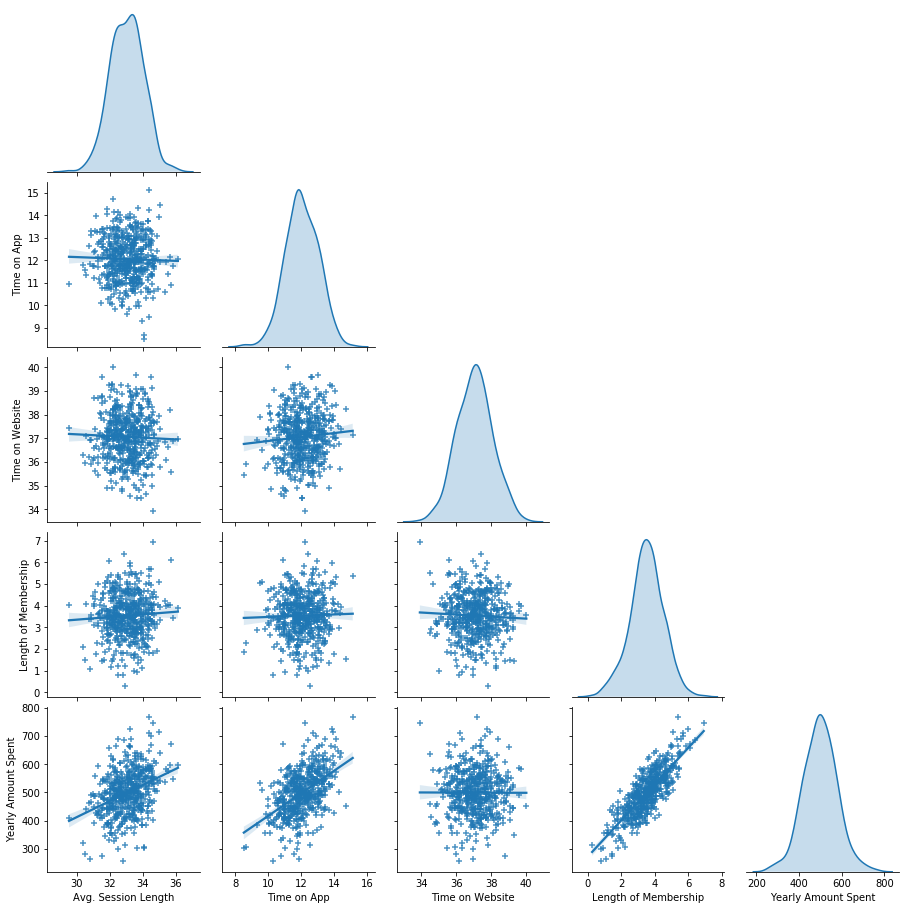

In [7]:
sns.pairplot(df, corner=True, diag_kind='kde', kind='reg', markers='+')

---

From all the numerical variables (notice how `pairplot` automatically excludes non-numerical variables!) it seems clear that we want to use `Yearly Amount Spent` as our dependent variable. As for the independent variable it seems like the best candidate is `Length of Membership`, as it shows a clear linear relationship with our dependent variable.

Now that we've selected our independent and dependent variables, let's split them into an `X` and a `y` variable respectively, and check the shapes to verify that the independent variable is in **matrix** form and the dependent variable in **vector** form.

### Split the dependent and independent variables

In [8]:
# Split the independent and dependent variables into X and y
X = df[['Length of Membership']]
y = df['Yearly Amount Spent']

In [9]:
# Check the shapes
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (500, 1)
y shape: (500,)


We can see that the independent variable, is in matrix form, defined by two dimensions: rows and columns, even if we have only one column in this case. The dependent variable is correctly encoded as a vector, defined only by its length.

We can now split our data into a training and a testing set. Load the necessary function from `sklearn` and split the data into 20% test and 80% train. Set the random state to the number 23, for reproducibility. As always check the shapes to verify it all worked out ok.

### Split the data into 80/20 train/test

In [10]:
# Import the relevant function from sklearn
from sklearn.model_selection import train_test_split

In [11]:
# Perform the train/test split with random_state=23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [12]:
# Check the shapes
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train: (400, 1)
y_train: (400,)
X_test: (100, 1)
y_test: (100,)


Now that we have a clean train/test split we can start building our simple linear regression model. Import the relevant class from `sklearn`, create your model variable and fit it using the training data. Then use the fitted model to generate predictions on **both** the train and test sets and use those predictions to visualise the regression line (with the train set predictions) and calculate error metrics (with the test set predictions).

### Define and fit a Simple Linear Regression

In [13]:
# Import the relevant class
from sklearn.linear_model import LinearRegression

In [14]:
# Define the model variable
lin_reg = LinearRegression()

In [15]:
# Fit it
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Examine and interpret the coefficients

In [16]:
# View the intercept
lin_reg.intercept_

268.10209559699547

In [17]:
# View the slope
lin_reg.coef_

array([65.12978978])

### Generate predictions for the test set

In [18]:
# Calculate predictions for the train set
preds_train = lin_reg.predict(X_train)

In [19]:
# Calculate predictions for the test set
preds_test = lin_reg.predict(X_test)

### Visualise the regression line

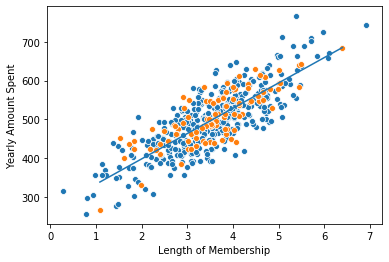

In [20]:
# Plot the train set points, test set points, and regression line
sns.scatterplot(X_train['Length of Membership'], y_train)
sns.scatterplot(X_test['Length of Membership'], y_test)
sns.lineplot(X_test['Length of Membership'], preds_test)

### Calculate error metrics

In [21]:
# Import the relevant sklearn functions
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# Calculate and print metrics
mae = mean_absolute_error(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 33.58266137569453
RMSE: 42.14097487235867


The `Mean Absolute Error`(MAE) and the `Mean Squared Error` (MSE) are similar in interpretation, despite different calculations and how they treat outliers. The MAE calculates a residual for every data point and takes the absolute value of each so that negative and positive residuals do not cancel out. Then, it takes the average of all these residuals. The MSE does the same thing, but squares the difference and then sums them all rather than relying on the absolute value. Both metrics effectively tell us how well our model predicts the data. The scores range from 0 to infinity, with smaller values indicating the model is doing a good job predicting the output, while a value of 0 means that the model is a perfect predictor of the response variable. The `Root Mean Squared Error` (RMSE) is the square root of the MSE. By taking the square root, the units match those of the output variable, which make interpretation a bit easier.

The maths behind each of these metrics is explained in-depth [here](https://www.dataquest.io/blog/understanding-regression-error-metrics/).

The average absolute error is ~£51 and the spread of the error, as measured by the RMSE is ~£59. Remember that RMSE penalises big errors more than MAE so it is always the case that RMSE > MAE.

---
<h1><center>Break</center></h1>
<center>Go back to the workshop to learn about more linear regression assumptions!</center>

---

## Checking Linear Regression Assumptions

As we have seen, there are 4 major assumptions that we'll cover in this module, namely:

* Linearity
* Normally Distribution of Residuals
* Homoscedasticity
* Independence

In this section we will walk through each of these assumptions and see how to check them.

### Linearity

Linearity is the one assumption from the list that we can check **before** even building the model. In this very notebook, in the step where we had to select the independent variable, we were implicitly selecting the variable that best fits this assumption.

Linearity states that the relationship between the independent and dependent variable should be linear. Let us bring back the pairplot from the previous section and verify that the variable we have selected is linearly related to our dependent variable.

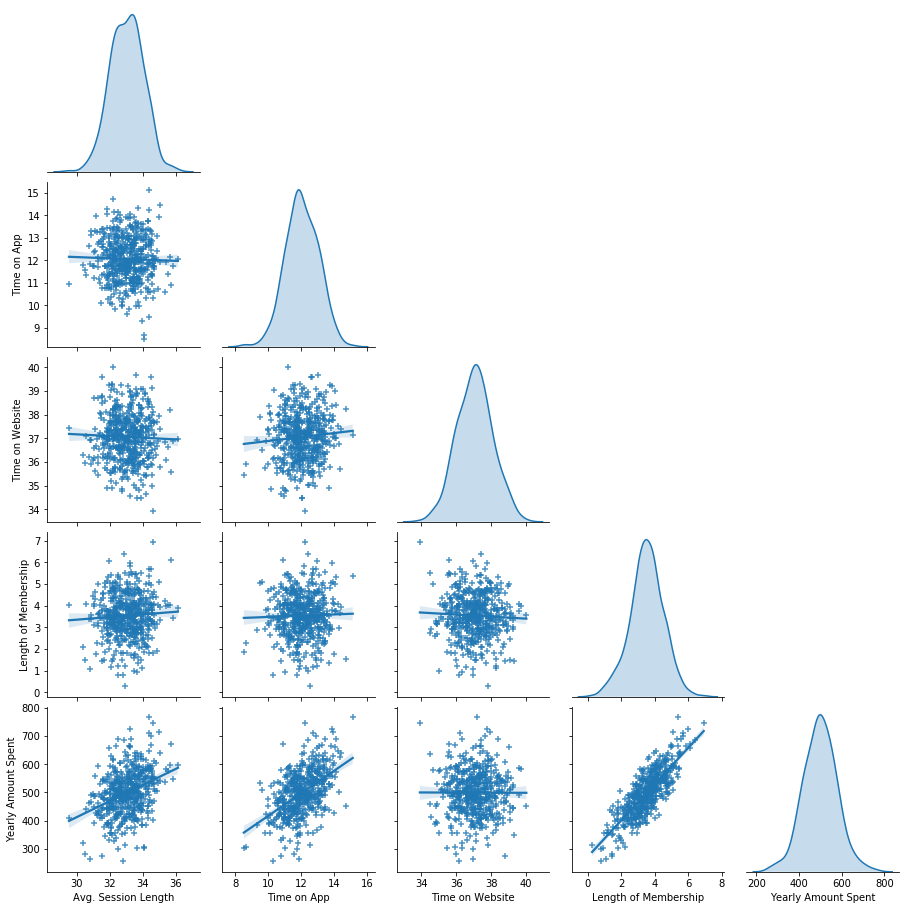

In [23]:
# Bring back the pairplot
sns.pairplot(df, corner=True, diag_kind='kde', kind='reg', markers='+')

Of the four independent variable candidates above, it is clear that `Length of Membership` (the one we selected) has a strong linear relationship with the target. Other variables such as `Avg. Session Length` and `Time on App` also have a linear relationship although not as strong. `Time on Website`, however, does not exhibit a linear relationship with the target and so we should be wary of using it as an independent variable.

### Normally Distributed Residuals

This optional assumption states that the residuals should be normally distributed. While not very important for prediction, the normal distribution of residuals is crucial when determining confidence intervals for our coefficients, something we will look at closely in the online practice.

There are many different tests designed to test whether a distribution is normal. We will focus on visually inspecting a histogram of residuals, but we also introduce, as supplemental material the use of normal Q-Q plots.

For assumption validation we'd like to use all available data. We can go back to our original `X` and `y` variables defined right before the train/test split to get access to **all** data without having to bother with concatenation (or combining variables). 

We'd start by generating predictions for the entire dataset (`X`), then calculate the residuals (defined as **true - predicted**), and then plotting a histogram.

In [24]:
# Calculate predictions for the original X variable
preds_all = lin_reg.predict(X)

In [25]:
# Calculate the residuals
residuals = y - preds_all

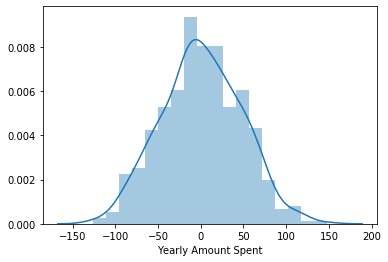

In [26]:
# Plot a histogram of the residuals
sns.distplot(residuals)

Although the number of bins in the histogram is automatically set, we can always take control and choose a higher (or lower) number of bins for more detail:

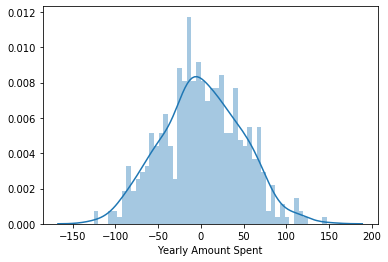

In [27]:
# Plot a histogram of the residuals with more bins
sns.distplot(residuals, bins=50)

We can see from the histograms above that the distribution of residuals follows a more or less normal distribution.

---
**Optional**

Another wide-spread tool to verify that residuals are normally distributed is to use a normal Q-Q plot. The Qs in Q-Q plot stand for quantile. A **quantile** divides a frequency distribution into equal groups, each containing the same fraction of the total population. For example we could divide our data into two groups, each containing exactly 50% of the data. This would be a quantile, and it's known as the median. We could also split our data into groups containing exactly 25% of the data each, something known as quartiles. 

The idea of a normal Q-Q plot is to compare the quantiles of our distribution (in our case the residuals) with those of a pure normal distribution. If the quantiles match (meaning they form a perfect diagonal line), then our distribution resembles a normal distribution.

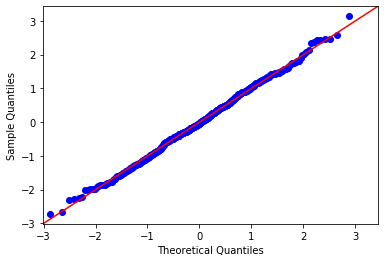

In [28]:
from statsmodels.graphics.gofplots import qqplot

qq = qqplot(residuals, line='45', fit=True)

We can see that the points line up nicely along a straight diagonal line, confirming that our distribution resembles a normal distribution. If you choose to use Q-Q plots in your own projects and find that the points don't lie in a straight line you can use [this](https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html) nice article to understand why. The code is written in `R` instead of `Python` but the graphs should be self-explanatory.

---

### Homoscedasticity and Independence

This two assumptions can be verified with the same plot, namely a scatterplot of the residual against the prediction. Let's review what each of these mean and what we're looking for:

* **Homoscedasticity**, or in other words constant variance of the residuals. It is important to verify, or at least understand, how our residuals' variance varies with the magnitude of the predictions. There are cases where the predictions are more accurate (less variance) on one extreme of the range of predictions and less accurate (more variance) on the other extreme.

* **Independence**. This assumption is most relevant when dealing with time series data. What we are looking here is for 'randomness' in the residuals, meaning no autocorrelation. Autocorrelation may reveal itself in this plot as any noticeable pattern that would allow us to predict the next residual.

We already have all the variables we need: the predictions for the entire dataset and the associated residuals.

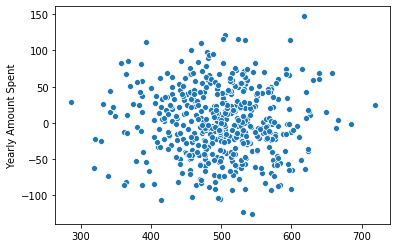

In [29]:
# Build a scatterplot of residuals vs. predicted value
sns.scatterplot(preds_all, residuals)

There is no noticeable change in the variance of the residuals based on the magnitude of the predictions, so we have homoscedasticity.

In addition there is no apparent pattern to the residuals that would imply autocorrelation and so we have independence.

---
<h1><center>Break</center></h1>
<center>That concludes the first step of our linear regression pipeline. We have loaded and cleaned the data, visually inspected the variables to choose the best candidate for simple linear regression, trained a model and measured the accuracy of its predictions, and verified all assumptions.</center><br>

<center>Now it's time to see how we can make use of more variables to enhance the predictive power of the model by moving from simple linear regression to <b>multiple linear regression</b>.</center>

---

## Multiple Linear Regression and Multicollinearity

We are now ready to incorporate more variables to our regression model, but we have to be **really careful** about **multicollinearity**. Thus the first thing we do is to make sure that the variables we plan to include are not mutually correlated.

### Qualitatively assessing multicollinearity

There are two ways we can check. The first is to look at all the scatterplots between independent variables. Happily we already know how to do that as it is part of the output of `seaborn`'s `pairplot`. Let's bring it back once again.

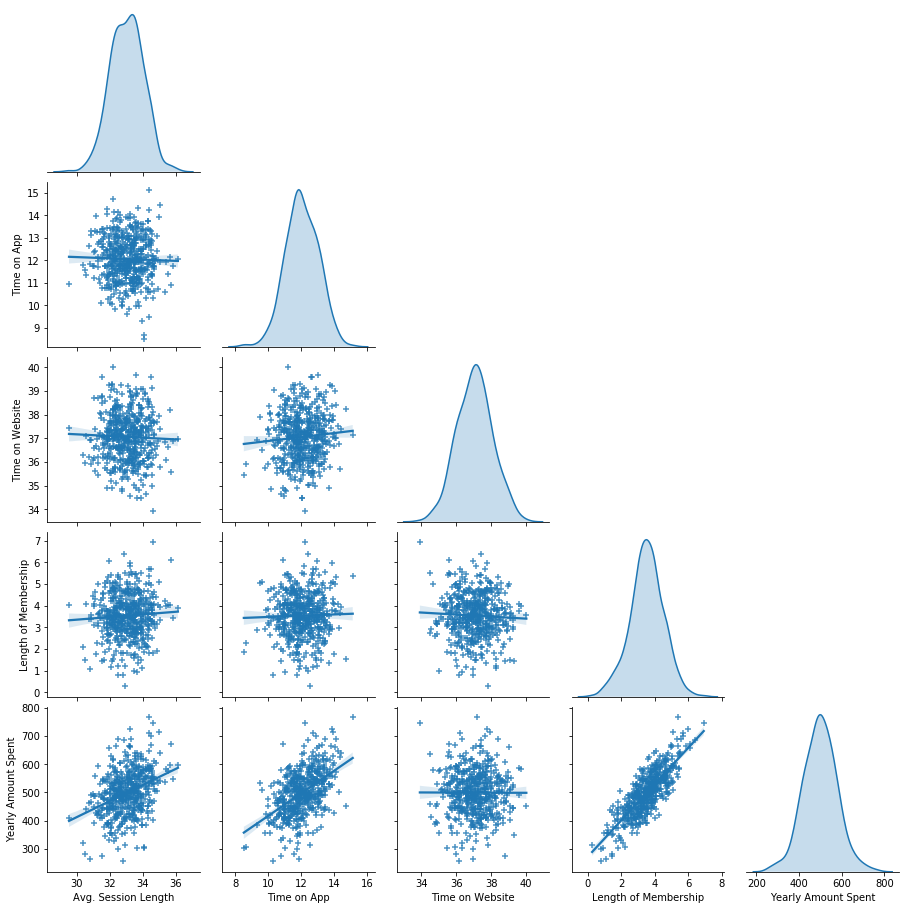

In [30]:
# Bring back the pairplot (once again)
sns.pairplot(df, corner=True, diag_kind='kde', kind='reg', markers='+')

There does not seem to be any correlation between the independent variables, which is a really good sign. In this case it seems very clear-cut but in other cases and other datasets it may not be so obvious from the scatterplots. So how can we quantitatively check for multicollinearity?

### Quantitatively assessing multicollinearity

One way we can go about this is to look at the **correlation matrix**.

In [31]:
# Display the correlation matrix
df.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


The information in the table above is more specific, but a bit harder to read. We can use the `heatmap` function from the `seaborn` library to get the visual and numeric benefits of both methods.

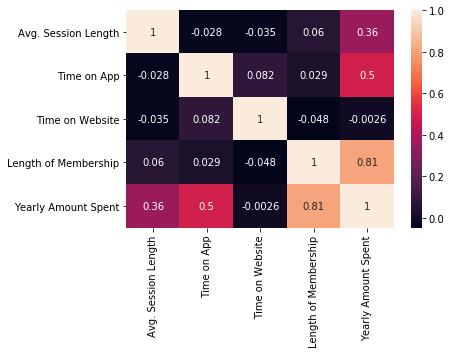

In [32]:
# Create an annotated heatmap of the correlations. The "annot" parameter tells the plot to display labels
sns.heatmap(df.corr(), annot=True)

Lighter colours indicate correlations closer to 1 (strong positive correlation), while darker colours indicate correlations closer to -1 (strong negative correlation). We call the specific value for each correlation the "correlation coefficient". It gives us both the magnitude and direction of a relationship between two variables.

A good rule of thumb of what constitutes multicollinearity is if the value of the coefficient is greater than +0.6 or smaller than -0.6. In this case we are happily free of multicollinearity and we can continue with our analysis.

If you encounter multicollinearity in your own projects there are several alternatives available. Some of the most common ones are:

* Removing one of the highly correlated variables
* Combining both correlated variables into one

You can read more on multicollinearity [here](https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis).

### Multiple Linear Regression

Time to implement our multiple linear regression. Choose which variables you'd like to include in the model and follow the same steps from the simple linear regression section above to define your `X` and `y` variables, split them into a train and a test set, define and fit a multiple linear regression (the syntax is exactly the same as in the case of simple linear regression, the only thing that changes is what we pass to the `.fit()` method!), generate predictions on the test set and evaluate the error metric or metrics of your choice.

In [33]:
# Define the `X` and `y` variables
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [34]:
# Split the data into a training and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [35]:
# Define and fit a linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# Print and interpret the intercept

In [37]:
lin_reg.intercept_

-1033.5580565030823

In [38]:
# Print and interpret the coefficients
lin_reg.coef_

array([25.48497551, 38.89302625,  0.1080787 , 61.62404236])

### Generate predictions for the test set

In [39]:
# Calculate predictions for the train set
preds_train = lin_reg.predict(X_train)

In [40]:
# Calculate predictions for the test set
preds_test = lin_reg.predict(X_test)

### Calculate error metrics

In [41]:
# Calculate and print metrics
mae = mean_absolute_error(y_test, preds_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)

print('MAE:', mae)
print('RMSE:', rmse)

MAE: 7.984627325998276
RMSE: 9.989147886013551
